In [1]:
#Making required import(s)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the csv files
matches=pd.read_csv('matches.csv') 
deliveries=pd.read_csv('deliveries.csv')
deliveries=deliveries.rename(columns={"match_id": "id"}) #changing the name of first column to merge

In [3]:
#Merging both the datasets for ease of certain types of analysis later on
merged = matches[['id','season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3']].merge(deliveries[['id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder']], on = "id", how = "left")

In [4]:
matches.shape

(756, 18)

In [5]:
merged.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# EDA

In [6]:
merged.isnull() #There are null values in the datasets

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
179074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
179075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


There are null values present in the dataset for non-numeric variables. We will replace the null values with 0 for now.

In [7]:
#Dropping those rows which are completely null (if any)
matches=matches.dropna(how='all')
deliveries=deliveries.dropna(how='all')

merged=merged.dropna(how='all')

In [8]:
#Filling the null values with 0
matches=matches.fillna(0)
deliveries=deliveries.fillna(0)
merged=merged.fillna(0)

There is one discrepancy in the matches data where no umpire data is there for certain matches. We will see if we need to remove them later on.

Another discrepancy observed is that "Rising Pune Supergiant" is also named as "Rising Pune Supergiants". Therefore, it is considered as two separate teams. This has to be corrected in the main data. The correction was done in the excel file by replacing all incorrect spellings with the correct ones.

In [9]:
#Average Number of matches played per season
matches['season'].value_counts().mean()

63.0

<AxesSubplot:title={'center':'No. of matches played per season'}>

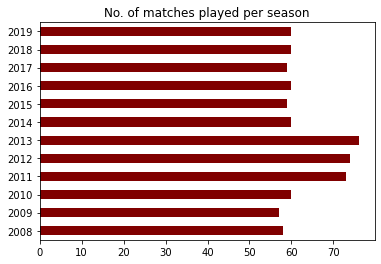

In [10]:
#Plot of Number of matches played per season
matches['season'].value_counts().sort_index().plot.barh(title="No. of matches played per season",color='maroon')

Maximum no. of matches was played in 2013, followed by 2012 and 2011. The average number of matches played per season is 63.

In [11]:
matches['venue'].value_counts() #Number of matches played in each venue for all seasons

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

Maximum matches have been played at Eden Gardens of Kolkata, followed by Wankhede Stadium of Mumbai and so on.

In [12]:
t1=pd.crosstab(matches['venue'],matches['winner'])
t1.drop([0],axis=1,inplace=True)

In [13]:
from scipy.stats import chi2_contingency
chi2_contingency(t1)

(2038.15665561787,
 3.195749645617725e-178,
 520,
 array([[ 0.26595745,  0.07712766,  0.02659574,  0.17819149,  0.03457447,
          0.21808511,  0.01595745,  0.24468085,  0.28989362,  0.03191489,
          0.19946809,  0.03989362,  0.22340426,  0.15425532],
        [ 0.93085106,  0.26994681,  0.09308511,  0.62367021,  0.12101064,
          0.76329787,  0.05585106,  0.85638298,  1.01462766,  0.11170213,
          0.6981383 ,  0.13962766,  0.78191489,  0.53989362],
        [ 1.46276596,  0.42420213,  0.1462766 ,  0.98005319,  0.19015957,
          1.19946809,  0.08776596,  1.34574468,  1.59441489,  0.17553191,
          1.09707447,  0.21941489,  1.2287234 ,  0.84840426],
        [ 0.39893617,  0.11569149,  0.03989362,  0.26728723,  0.0518617 ,
          0.32712766,  0.02393617,  0.36702128,  0.43484043,  0.04787234,
          0.29920213,  0.05984043,  0.33510638,  0.23138298],
        [ 0.39893617,  0.11569149,  0.03989362,  0.26728723,  0.0518617 ,
          0.32712766,  0.02393617,  

Venue and Winner are associated since p value < 0.05. 
1. Venue can be an important factor in deciding the winner of the match. Historical data of a team's performance at a particular venue can help predict an outcome of an upcoming match. Home/Known ground advantage is thus an attribute which determines the winner in the match. If you are playing in the home ground conditions everything would be in your hands like climatic factors, pitch nature and major role isplayed by the home crowd. Home Team gets better motivation.

Toss: According to cricket analysts, there is sure measure of advantage for a team if it wins the toss. This might not be deciding factor in a match but it would give the team the
opportunity of choosing “what they want” leading to motivation and energy boost up. Here we will try to find out if the toss winners and winners are associated.

In [14]:
t2=pd.crosstab(matches['toss_winner'],matches['winner'])
t2.drop([0],axis=1,inplace=True)


In [15]:
from scipy.stats import chi2_contingency
chi2_contingency(t2)

(2643.2059571616546,
 0.0,
 169,
 array([[11.83510638,  3.43218085,  1.18351064,  7.92952128,  1.53856383,
          9.70478723,  0.71010638, 10.88829787, 12.90026596,  1.42021277,
          8.87632979,  1.77526596,  9.94148936,  6.8643617 ],
        [ 5.71808511,  1.65824468,  0.57180851,  3.83111702,  0.74335106,
          4.68882979,  0.34308511,  5.2606383 ,  6.23271277,  0.68617021,
          4.28856383,  0.85771277,  4.80319149,  3.31648936],
        [ 1.32978723,  0.3856383 ,  0.13297872,  0.89095745,  0.17287234,
          1.09042553,  0.07978723,  1.22340426,  1.44946809,  0.15957447,
          0.99734043,  0.19946809,  1.11702128,  0.7712766 ],
        [10.50531915,  3.04654255,  1.05053191,  7.03856383,  1.36569149,
          8.6143617 ,  0.63031915,  9.66489362, 11.45079787,  1.2606383 ,
          7.87898936,  1.57579787,  8.82446809,  6.09308511],
        [ 1.99468085,  0.57845745,  0.19946809,  1.33643617,  0.25930851,
          1.6356383 ,  0.11968085,  1.83510638,  2.17

Here p value<0.05. Hence winners and toss_winners are associated.

2. Toss_winner can be considered as another factor affecting winning in a cricket match as explained earlier.

Does batting first increase chances of winning?

If the team is uncertain about the nature of the pitch or simply wants to play safe, they often bat first. If the opposition bowling is strong, batting first is often considered a good option.Another advantage of batting first is that the batting team sets a target for the team batting second to chase. We will try to see the percentage of times a team has won based on its batting first.

In [16]:
matches['bat/bowl']=0 #this column will store whether the winning team batted first
for i in range(0,len(matches)):
    if matches['win_by_runs'][i]>0:
        matches['bat/bowl'][i]="First bat"
    elif matches['win_by_wickets'][i]>0:
        matches['bat/bowl'][i]="First bowl"
    elif matches['result'][i]=='no result':
        matches['bat/bowl'][i]="No result"
        matches['winner'][i]="No result"
    elif matches['result'][i]=='tie':
        matches['bat/bowl'][i]="Tie"


<AxesSubplot:title={'center':'Stacked Bar Plot of Winners and toss decision'}, xlabel='winner'>

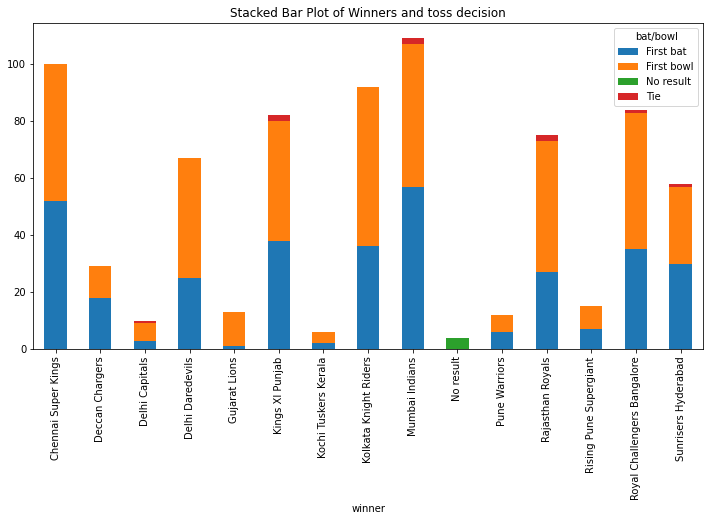

In [17]:
t3=pd.crosstab(matches['winner'],matches['bat/bowl'])

t3.plot(kind='bar',stacked=True,figsize=(12,6),title="Stacked Bar Plot of Winners and toss decision")

The stacked diagram shows percentage of times a team has won when they have batted first/bowled first. "No result" can be ignored here. It also shows the tie winners. 

3. It can be inferred from the above stacked bar chart that for majority of the winner teams won greater percentage of the times when they have bowled first as compared to when they have batted first.

We will now make a table and identify the IPL season winners.

In [18]:
result  = pd.crosstab(matches['season'],matches['winner'])

result['winner_ipl_team'] = result.apply(lambda x: result.columns[x.argmax()], axis = 1)
result
#The team that won maximum times in a season is the winner of the season of IPL as displayed 
#in the "winner_ipl_team" column.


winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,No result,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Royal Challengers Bangalore,Sunrisers Hyderabad,winner_ipl_team
season,,,,,,,,,,,,,,,,
2008,9,2,0,7,0,10,0,6,7,0,0,13,0,4,0,Rajasthan Royals
2009,8,9,0,10,0,7,0,3,5,0,0,6,0,9,0,Delhi Daredevils
2010,9,8,0,7,0,4,0,7,11,0,0,6,0,8,0,Mumbai Indians
2011,11,6,0,4,0,7,6,8,10,1,4,6,0,10,0,Chennai Super Kings
2012,10,4,0,11,0,8,0,12,10,0,4,7,0,8,0,Kolkata Knight Riders
2013,12,0,0,3,0,8,0,6,13,0,4,11,0,9,10,Mumbai Indians
2014,10,0,0,2,0,12,0,11,7,0,0,7,0,5,6,Kings XI Punjab
2015,10,0,0,5,0,3,0,7,10,2,0,7,0,8,7,Chennai Super Kings
2016,0,0,0,7,9,4,0,8,7,0,0,0,5,9,11,Sunrisers Hyderabad


<AxesSubplot:>

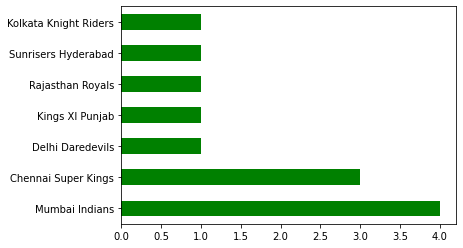

In [19]:
result['winner_ipl_team'].value_counts().plot(kind='barh',color="green")

The above chart shows that from 2008 to 2019, Mumbai Indians have become season winner maximum no. of times among the other season winners.

To check overall for all seasons, which team has won the maximum matches.

<AxesSubplot:>

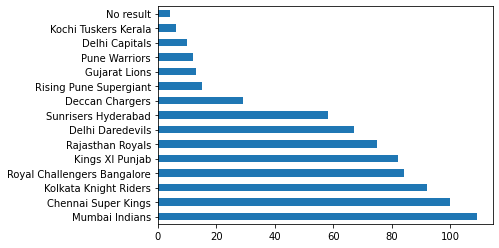

In [39]:
matches['winner'].value_counts().plot(kind='barh')

Therefore, Mumbai Indians have won 109 matches for all the IPL seasons so far followed by Chennai Super kings and Kolkata Knight Riders.

To find the teams who have won by the highest mean runs per match in an ipl season.

In [20]:
#Pivot Table for win_by_runs

runs=pd.pivot_table(matches,index=["season"],values=["win_by_runs"],
               columns=["winner"],aggfunc='mean',fill_value=0)
runs['best_season_runs']=runs.max(axis=1)

runs['best_season_team']=runs.apply(lambda x:runs.columns[x.argmax()],axis=1)

#best_season_teams are not IPL winners. They just won by the highest mean runs per match in a season.

<AxesSubplot:>

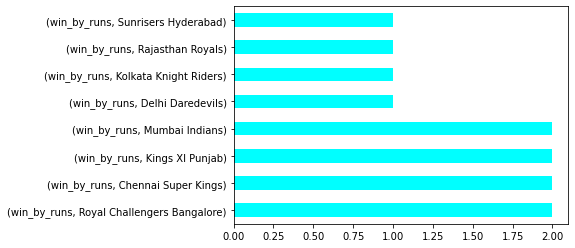

In [22]:
runs['best_season_team'].value_counts().plot(kind='barh',color="cyan")

The graph shows that Kings XI Punjab, Mumbai Indians and Chennai Super Kings have won by the highest mean runs maximum times in all seasons.

To find the teams who have won by the highest mean wickets per match in an ipl season.

In [23]:
#Pivot Table for win_by_wickets

wickets=pd.pivot_table(matches,index=["season"],values=["win_by_wickets"],columns=["winner"],aggfunc='mean',fill_value=0)
wickets['best_season_wickets']=wickets.max(axis=1)

wickets['best_season_team']=wickets.apply(lambda x:wickets.columns[x.argmax()],axis=1)

#best_season_teams are not IPL winners. They just won by the highest mean wickets per match in a season.
wickets

win_by_wickets                                                  \
winner Chennai Super Kings Deccan Chargers Delhi Capitals Delhi Daredevils   
season                                                                       
2008              3.222222        8.500000            0.0         5.142857   
2009              1.750000        2.888889            0.0         4.900000   
2010              2.777778        2.250000            0.0         2.428571   
2011              2.000000        1.000000            0.0         1.750000   
2012              3.000000        1.250000            0.0         5.636364   
2013              2.333333        0.000000            0.0         5.333333   
2014              4.400000        0.000000            0.0         5.000000   
2015              1.600000        0.000000            0.0         4.000000   
2016              0.000000        0.000000            0.0         5.142857   
2017              0.000000        0.000000            0.0         2.500000   
2018              3.636364        0.000000            0.0         1.400000   
2019              4.100000        0.000000            2.9         0.000000   

                                                           \
winner Gujarat Lions Kings XI Punjab Kochi Tuskers Kerala   
season                                                      
2008        0.000000        3.200000                    0   
2009        0.000000        3.142857                    0   
2010        0.000000        5.250000                    0   
2011        0.000000        2.857143                    5   
2012        0.000000        3.375000                    0   
2013        0.000000        4.125000                    0   
2014        0.000000        2.916667                    0   
2015        0.000000        0.000000                    0   
2016        4.555556        3.250000                    0   
2017        6.000000        3.428571                    0   
2018        0.000000        3.500000                    0   
2019        0.000000        3.333333                    0   

                                                                     \
winner Kolkata Knight Riders Mumbai Indians No result Pune Warriors   
season                                                                
2008                1.333333       5.714286         0          0.00   
2009                3.666667       1.600000         0          0.00   
2010                3.428571       1.454545         0          0.00   
2011                4.000000       3.300000         0          5.50   
2012                2.833333       3.900000         0          1.75   
2013                4.166667       1.615385         0          1.75   
2014                4.090909       3.428571         0          0.00   
2015                3.571429       2.000000         0          0.00   
2016                4.750000       4.571429         0          0.00   
2017                5.444444       3.083333         0          0.00   
2018                3.777778       2.333333         0          0.00   
2019                4.333333       2.090909         0          0.00   

                                                                            \
winner Rajasthan Royals Rising Pune Supergiant Royal Challengers Bangalore   
season                                                                       
2008           3.769231                    0.0                    2.500000   
2009           2.500000                    0.0                    3.888889   
2010           2.833333                    0.0                    6.500000   
2011           7.500000                    0.0                    4.800000   
2012           1.714286                    0.0                    3.125000   
2013           4.454545                    0.0                    2.444444   
2014           3.142857                    0.0                    4.800000   
2015           3.428571                    0.0                    4.375000   
2

<AxesSubplot:>

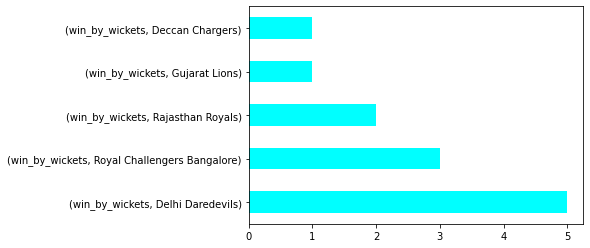

In [24]:
wickets['best_season_team'].value_counts().plot(kind='barh',color="cyan")

The graph shows that Delhi Daredevils has won by the highest mean wickets maximum times in all seasons.

Next, let's find out the best player_of_match season wise.

In [33]:
#For each season, we want to find out who became player_of_match maximum times to get our best performer season wise
t3=pd.crosstab(matches['season'],matches['player_of_match'])
t3['best_performer_season']=t3.apply(lambda x:t3.columns[x.argmax()],axis=1)

t3.drop([0],axis=1,inplace=True) #There is not player_of_match for those matches with "No result"
t3

player_of_match,A Chandila,A Joseph,A Kumble,A Mishra,A Nehra,A Singh,A Symonds,A Zampa,AA Jhunjhunwala,AB Dinda,...,V Sehwag,VR Aaron,WP Saha,WPUJC Vaas,Washington Sundar,YK Pathan,YS Chahal,Yuvraj Singh,Z Khan,best_performer_season
season,,,,,,,,,,,,,,,,,,,,,
2008,0,0,1,1,1,0,0,0,0,0,...,2,0,0,0,0,4,0,0,0,SE Marsh
2009,0,0,1,1,1,1,0,0,0,0,...,1,0,0,0,0,3,0,2,0,YK Pathan
2010,0,0,1,0,0,0,3,0,1,0,...,1,0,0,1,0,2,0,0,0,SR Tendulkar
2011,0,0,0,2,0,0,0,0,0,0,...,2,0,1,0,0,2,0,1,0,CH Gayle
2012,1,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,CH Gayle
2013,0,0,0,4,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,MEK Hussey
2014,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,0,GJ Maxwell
2015,0,0,0,0,3,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,DA Warner
2016,0,0,0,1,1,0,0,1,0,2,...,0,0,0,0,0,2,0,0,0,V Kohli


<AxesSubplot:>

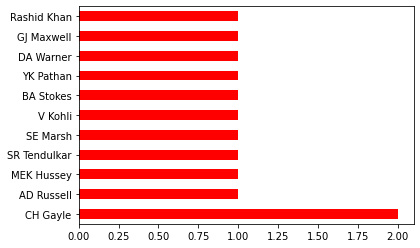

In [34]:
t3['best_performer_season'].value_counts().plot(kind='barh',color="red")

CH Gayle has become the best performer season wise twice as compared to the other best performers (became player_of_match in maximum no. of matches in a season).

We will now check which batsman has score highest runs per season.

In [41]:
#Pivot Table for total runs per season of a batsman
batsman_season=pd.pivot_table(merged,index=["season"],values=["total_runs"],columns=['batsman'],aggfunc='sum',fill_value=0)
batsman_season['best_season_runs']=batsman_season.max(axis=1)

batsman_season['best_season_batsman']=batsman_season.apply(lambda x:batsman_season.columns[x.argmax()],axis=1)
batsman_season

#best_season_batsman refers to the batsman who scored the highest total runs in all the matches in a seson.

total_runs                                                         \
batsman A Ashish Reddy A Chandila A Chopra A Choudhary A Dananjaya A Flintoff   
season                                                                          
2008                 0          0       45           0           0          0   
2009                 0          0       13           0           0         72   
2010                 0          0        0           0           0          0   
2011                 0          0        0           0           0          0   
2012                40          0        0           0           0          0   
2013               126          4        0           0           0          0   
2014                 0          0        0           0           0          0   
2015                74          0        0           0           0          0   
2016                48          0        0           0           0          0   
2017                 0          0        0          25           0          0   
2018                 0          0        0           0           4          0   
2019                 0          0        0           0           0          0   

                                            ...                       \
batsman A Hales A Joseph A Kumble A Mishra  ... YA Abdulla YK Pathan   
season                                      ...                        
2008          0        0       17       37  ...          0       454   
2009          0        0       17       27  ...          0       272   
2010          0        0        8       45  ...          1       343   
2011          0        0        0       75  ...          0       291   
2012          0        0        0       17  ...          0       218   
2013          0        0        0       97  ...          0       345   
2014          0        0        0        8  ...          0       272   
2015          0        0        0        9  ...          0       337   
2016          0        0        0        4  ...          0       379   
2017          0        0        0       55  ...          0       155   
2018        156        0        0        1  ...          0       292   
2019          0       15        0       33  ...          0        46   

                                                                             \
batsman YS Chahal YV Takawale Yashpal Singh Younis Khan Yuvraj Singh Z Khan   
season                                                                        
2008            0          78             0           3          307     36   
2009            0          18            49           0          373      8   
2010            0           0             0           0          272     24   
2011            0           0             0           0          353     21   
2012            0           0             0           0            0     12   
2013            0           0             0           0          244      0   
2014            2         111             0           0          397     10   
2015            1           0             0           0          257      0   
2016            0           0             0           0          242      6   
2017           13           0             0           0          265      4   
2018            2           0             0           0           67      0   
2019            6           0             0           0          118      0   

        best_season_runs          best_season_batsman  
batsman                                                
season                                                 
2008                 644       (total_runs, SE Marsh)  
2009                 626      (total_runs, ML Hayden)  
2010                 665   (total_runs, SR Tendulkar)  
2011                 638       (total_runs, CH Gayle)  
2012                 762       (total_runs, CH Gayle)  
2013                 778       (total_runs, CH Gayle)  
2014                 681 

<AxesSubplot:>

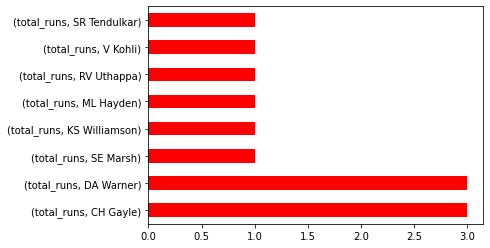

In [43]:
batsman_season['best_season_batsman'].value_counts().plot(kind='barh',color="red")

CH Gayle and DA Warner have scored the highest total runs in all the matches of 3 seasons.

Let's check what are the different types of dismissals in the IPL matches and which one is most frequent.

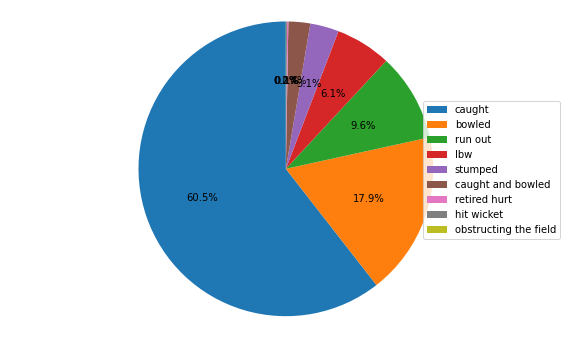

In [157]:
dis=merged[merged['dismissal_kind']!=0]['dismissal_kind']

dis=dis.value_counts()
plt.figure(figsize=(10,6))
plt.pie(dis,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend( loc = 'right', labels=dis.index)
plt.show()

From the pie chart, we can observe that mostly the players got dismissed by 'caught' dismissal_kind followed by bowled and run out.

Here,let's see the best fielder overall for all IPL seasons.

In [91]:
a1=pd.crosstab(deliveries['fielder'],deliveries['dismissal_kind'],margins=True)
a1.drop(0,inplace=True)
a1.drop(0,axis=1,inplace=True)
a1.drop('All',inplace=True)
a2=pd.DataFrame()
a2['Fielder Name']=a1.index.tolist()
a2['Total no. of dismissals']=a1['All'].tolist()
a2.sort_values(by="Total no. of dismissals",ascending=False,inplace=True) #sorting the fielders based on their overall dismissal scores 
a2=a2.reset_index()
a2.drop('index',axis=1,inplace=True)

In [93]:
#storing the fielders who are in top 10 based on overall dismissal scores
a2=a2[0:10]
a2.set_index('Fielder Name',inplace=True)

<AxesSubplot:title={'center':'Top 10 Fielders'}, ylabel='Fielder Name'>

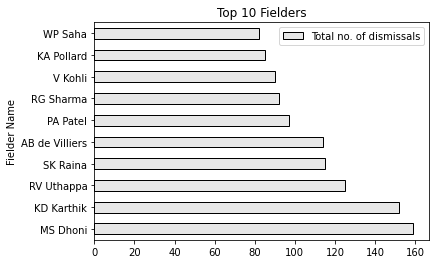

In [100]:
a2.plot(kind='barh',color=(0.1,0.1,0.1,0.1),  edgecolor='black', title="Top 10 Fielders")

The above plot displays that MS Dhoni has made the highest dismissals overall from 2008 to 2019 seasons followed by KD Karthik and RV Uthappa. They can be regarded as our best fielders.

ASSUMPTION: When there is no information of the fielder, then the dismissal credit goes to the available information of the bowler.

We will find out our best bowler for all the seasons now.

In [105]:
m1=merged['dismissal_kind'].tolist()
m2=merged['fielder'].tolist()

merged['bowler_dismiss_credit']=0

In [106]:
for i in range(len(m1)):
    if m1[i]!=0 and m2[i]==0:
        merged['bowler_dismiss_credit'][i]="yes"
    else:
        merged['bowler_dismiss_credit'][i]="no"

In [ ]:
merged[merged['bowler_dismiss_credit']=='yes']['bowler'].value_counts()

SL Malinga, PP Chawla and SP Narine are the top bowlers who have made the maximum dismissals in all the IPL seasons on a whole.

To find out the top batsmen who scored maximum no. of sixes and fours

In [204]:
f6=merged[merged['batsman_runs']==6]['batsman'].value_counts()
f4=merged[merged['batsman_runs']==4]['batsman'].value_counts()


In [206]:
f6

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
                 ... 
JM Kemp             1
RR Powar            1
AN Ahmed            1
KJ Abbott           1
L Balaji            1
Name: batsman, Length: 336, dtype: int64

In [207]:
f4

S Dhawan         526
SK Raina         495
G Gambhir        492
V Kohli          482
DA Warner        459
                ... 
S Singh            1
AG Murtaza         1
VRV Singh          1
SD Lad             1
DAJ Bracewell      1
Name: batsman, Length: 410, dtype: int64

Top 6 scorers are CH Gayle,AB de Villiers and MS Dhoni. Top 4 scorers are S Dhawan, SK Raina and G Gambhir.

# FINAL CONCLUSION

1. Maximum no. of matches was played in 2013, followed by 2012 and 2011. The average number of matches played per season is 63.


2. Maximum number of matches have been played at Eden Gardens of Kolkata, followed by Wankhede Stadium of Mumbai and so on for all seasons.


3. Venue and Winner are associated since p value < 0.05.
Venue can be an important factor in deciding the winner of the match. Historical data of a team's performance at a particular venue can help predict an outcome of an upcoming match. Home/Known ground advantage is thus an attribute which determines the winner in the match. If you are playing in the home ground conditions everything would be in your hands like climatic factors, pitch nature and major role is played by the home crowd. Home Team gets better motivation.


4. Toss: According to cricket analysts, there is sure measure of advantage for a team if it wins the toss. This might not be deciding factor in a match but it would give the team the opportunity of choosing “what they want” leading to motivation and energy boost up. Here we will try to find out if the toss winners and winners are associated.
p value<0.05. Hence winners and toss_winners are associated.
Toss_winner can be considered as another factor affecting winning in a cricket match as explained earlier.


5. Batting first: If the team is uncertain about the nature of the pitch or simply wants to play safe, they often bat first. If the opposition bowling is strong, batting first is often considered a good option.Another advantage of batting first is that the batting team sets a target for the team batting second to chase. We will try to see the percentage of times a team has won based on its batting first.
The stacked diagram shows percentage of times a team has won when they have batted first/bowled first. "No result" can be ignored here. It also shows the tie winners.
It can be inferred from the stacked bar chart that for majority of the winner teams won greater percentage of the times when they have bowled first as compared to when they have batted first.


6. From 2008 to 2019, Mumbai Indians have become season winner maximum no. of times among the other season winners.


7. Mumbai Indians have won 109 matches for all the IPL seasons so far followed by Chennai Super kings and Kolkata Knight Riders.


8. Kings XI Punjab, Mumbai Indians and Chennai Super Kings have won by the highest mean runs maximum times in all seasons.


9. Delhi Daredevils has won by the highest mean wickets maximum times in all seasons.


10. CH Gayle has become the best performer season wise twice as compared to the other best performers (became player_of_match in maximum no. of matches in a season).


11. CH Gayle and DA Warner have scored the highest total runs in all the matches of 3 seasons.


12. From the pie chart, we can observe that mostly the players got dismissed by 'caught' dismissal_kind followed by 'bowled' and 'run out'.


13. MS Dhoni has made the highest dismissals overall from 2008 to 2019 seasons followed by KD Karthik and RV Uthappa. They can be regarded as our best fielders.


14. SL Malinga, PP Chawla and SP Narine are the top bowlers who have made the maximum dismissals in all the IPL seasons on a whole.


15. Top 6 scorers are CH Gayle,AB de Villiers and MS Dhoni. Top 4 scorers are S Dhawan, SK Raina and G Gambhir.

# THE END